In [146]:
import keras


In [147]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 17, 17, 128)    

In [148]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

c:\Users\Gabriel\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [149]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'flowers/train'
validation_dir = 'flowers/validation'
 
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 2162 images belonging to 5 classes.
Found 1078 images belonging to 5 classes.


In [150]:
??train_datagen.flow_from_directory

Signature:
train_datagen.flow_from_directory(
    directory,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False,
)
Source:   
    def flow_from_directory(
        self,
        directory,
        target_size=(256, 256),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=32,
        shuffle=True,
        seed=None,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
        follow_links=False,
        subset=None,
        interpolation="nearest",
        keep_aspect_ratio=False,
    ):
        """Takes the path to a directory & generates batches of augmented data.

        Args:
            directory: string, path to the target directory. It should contain

In [151]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)


In [152]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size)

Epoch 1/30
108/108 [==============================] - 5s 42ms/step - loss: 1.4559 - acc: 0.3451 - val_loss: 1.2275 - val_acc: 0.4750
Epoch 2/30
108/108 [==============================] - 4s 40ms/step - loss: 1.2032 - acc: 0.4857 - val_loss: 1.1488 - val_acc: 0.4879
Epoch 3/30
108/108 [==============================] - 4s 39ms/step - loss: 1.1295 - acc: 0.5398 - val_loss: 1.1505 - val_acc: 0.5213
Epoch 4/30
108/108 [==============================] - 4s 40ms/step - loss: 1.0589 - acc: 0.5722 - val_loss: 1.0903 - val_acc: 0.5510
Epoch 5/30
108/108 [==============================] - 4s 41ms/step - loss: 0.9931 - acc: 0.6059 - val_loss: 1.1544 - val_acc: 0.5390
Epoch 6/30
108/108 [==============================] - 4s 41ms/step - loss: 0.9482 - acc: 0.6323 - val_loss: 1.0254 - val_acc: 0.5965
Epoch 7/30
108/108 [==============================] - 4s 40ms/step - loss: 0.8924 - acc: 0.6610 - val_loss: 1.0685 - val_acc: 0.5761
Epoch 8/30
108/108 [==============================] - 4s 40ms/step - 

In [153]:
model.save('flowers_1.h5')

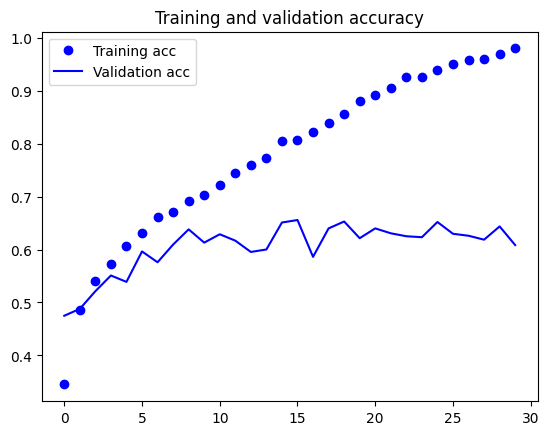

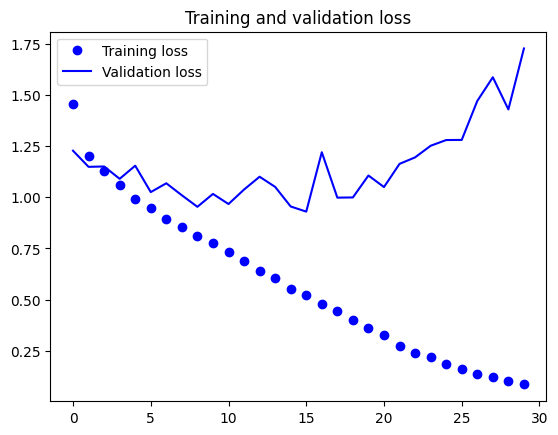

In [154]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Data augmentation




Overfitting is caused by having too few samples to learn from. <br>
Data augmentation process generates more training data from existing,<br>
by "augmenting" them via random transformations that give "believable" images.

In [155]:
datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [156]:
?ImageDataGenerator

Init signature:
ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None,
)
Docstring:     
Generate batches of tensor image data with real-time data augmentation.

Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
recommended for new code. Prefer loading images with
`tf.keras.utils.image_dataset_from_directory` and transforming the output
`tf.data.Dataset` with preprocessing layers. For more information, see the
tutoria

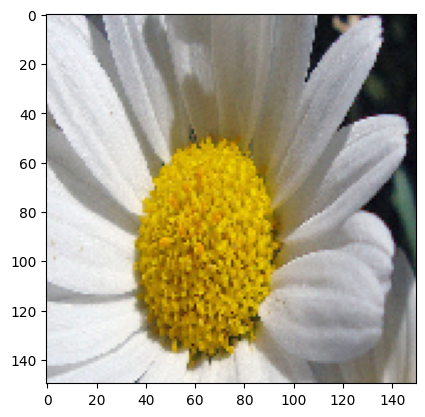

In [157]:
import os
# This is module with image preprocessing utilities
import keras.utils as image
import matplotlib.pyplot as plt

train_daisy_dir = 'flowers/train/daisy'
fnames = [os.path.join(train_daisy_dir, fname) for fname in os.listdir(train_daisy_dir)]

# We pick one image to "augment"
img_path = fnames[1]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

plt.imshow(img)

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)




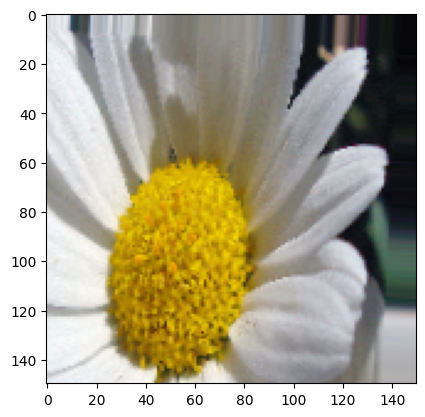

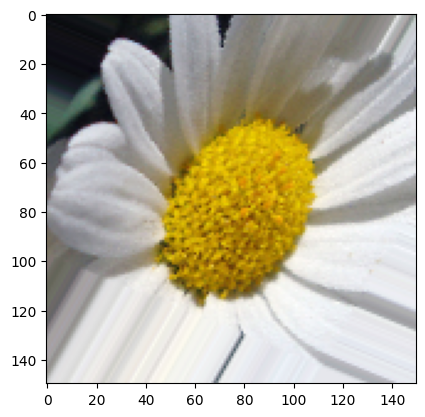

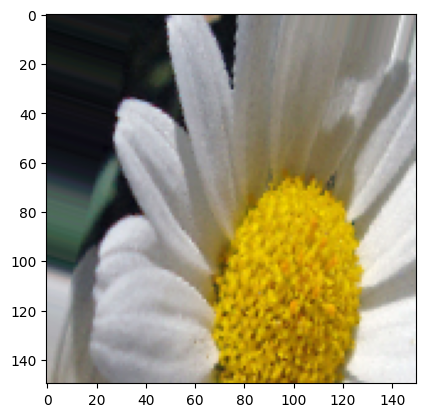

In [158]:
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break


# Adding Dropout layer and data augmentation 

In [159]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 17, 17, 128)    

In [160]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2162 images belonging to 5 classes.
Found 1078 images belonging to 5 classes.
data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 5)


In [161]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size)

Epoch 1/100
67/67 [==============================] - 11s 159ms/step - loss: 1.4288 - acc: 0.3737 - val_loss: 1.2902 - val_acc: 0.4212
Epoch 2/100
67/67 [==============================] - 11s 157ms/step - loss: 1.2747 - acc: 0.4366 - val_loss: 1.2113 - val_acc: 0.4657
Epoch 3/100
67/67 [==============================] - 11s 157ms/step - loss: 1.2216 - acc: 0.4727 - val_loss: 1.1780 - val_acc: 0.5121
Epoch 4/100
67/67 [==============================] - 11s 157ms/step - loss: 1.1672 - acc: 0.5051 - val_loss: 1.1304 - val_acc: 0.5130
Epoch 5/100
67/67 [==============================] - 11s 156ms/step - loss: 1.1382 - acc: 0.5273 - val_loss: 1.1208 - val_acc: 0.5529
Epoch 6/100
67/67 [==============================] - 11s 157ms/step - loss: 1.1078 - acc: 0.5615 - val_loss: 1.0748 - val_acc: 0.5891
Epoch 7/100
67/67 [==============================] - 11s 157ms/step - loss: 1.0801 - acc: 0.5611 - val_loss: 1.0592 - val_acc: 0.5835
Epoch 8/100
67/67 [==============================] - 11s 156ms

In [162]:
model.save('flowers_2.h5')

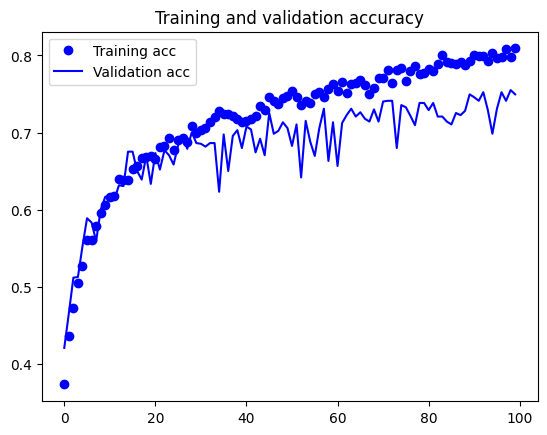

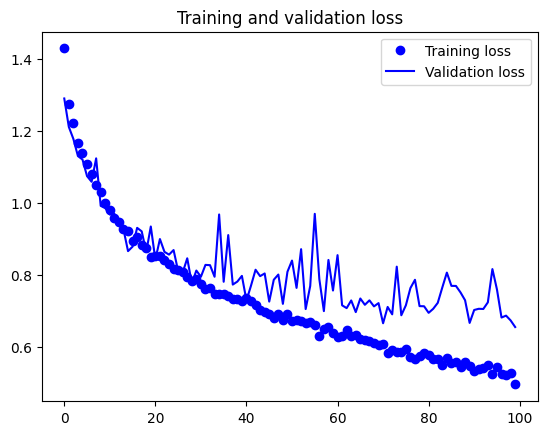

In [163]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Transfer learning

In [164]:
# Import model and its weights without top layers

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [165]:
# Add top layers

from keras import models
from keras import layers

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))

In [166]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_15 (Flatten)        (None, 8192)              0         
                                                                 
 dense_30 (Dense)            (None, 256)               2097408   
                                                                 
 dense_31 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 16,813,381
Trainable params: 2,098,693
Non-trainable params: 14,714,688
_________________________________________________________________


In [167]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

model.save('flowers_3.h5')

Found 2162 images belonging to 5 classes.
Found 1078 images belonging to 5 classes.
Epoch 1/30
100/100 - 12s - loss: 1.4063 - acc: 0.4309 - val_loss: 1.2193 - val_acc: 0.5510 - 12s/epoch - 115ms/step
Epoch 2/30
100/100 - 11s - loss: 1.1237 - acc: 0.5933 - val_loss: 1.0207 - val_acc: 0.6100 - 11s/epoch - 110ms/step
Epoch 3/30
100/100 - 11s - loss: 0.9939 - acc: 0.6423 - val_loss: 0.9110 - val_acc: 0.6810 - 11s/epoch - 109ms/step
Epoch 4/30
100/100 - 11s - loss: 0.9063 - acc: 0.6806 - val_loss: 0.8220 - val_acc: 0.7260 - 11s/epoch - 105ms/step
Epoch 5/30
100/100 - 11s - loss: 0.8402 - acc: 0.7018 - val_loss: 0.7781 - val_acc: 0.7360 - 11s/epoch - 106ms/step
Epoch 6/30
100/100 - 10s - loss: 0.8043 - acc: 0.7180 - val_loss: 0.7560 - val_acc: 0.7310 - 10s/epoch - 105ms/step
Epoch 7/30
100/100 - 10s - loss: 0.7654 - acc: 0.7301 - val_loss: 0.7283 - val_acc: 0.7540 - 10s/epoch - 100ms/step
Epoch 8/30
100/100 - 10s - loss: 0.7433 - acc: 0.7381 - val_loss: 0.7018 - val_acc: 0.7580 - 10s/epoch -

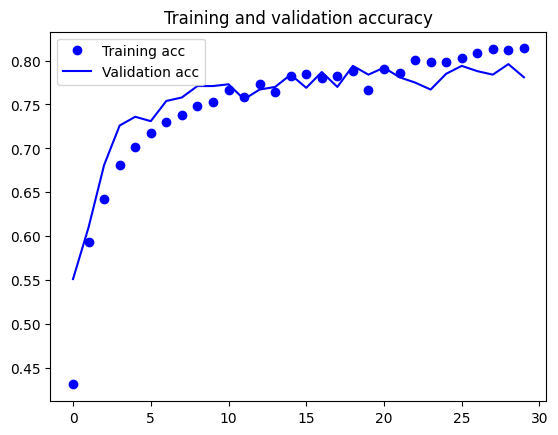

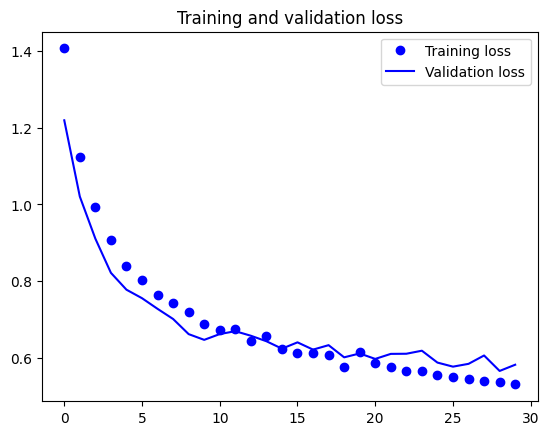

In [168]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Fine tunning

In [169]:
# Set upper layers of the transfered model as trainable 

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [170]:
# Compaile and fit a model with changes 

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

model.save('flowers_4.h5')

Epoch 1/30
100/100 [==============================] - 11s 105ms/step - loss: 0.5391 - acc: 0.8027 - val_loss: 0.5425 - val_acc: 0.8060
Epoch 2/30
100/100 [==============================] - 10s 101ms/step - loss: 0.4685 - acc: 0.8254 - val_loss: 0.5317 - val_acc: 0.8180
Epoch 3/30
100/100 [==============================] - 10s 102ms/step - loss: 0.4303 - acc: 0.8385 - val_loss: 0.5465 - val_acc: 0.8120
Epoch 4/30
100/100 [==============================] - 10s 102ms/step - loss: 0.3885 - acc: 0.8525 - val_loss: 0.5304 - val_acc: 0.8190
Epoch 5/30
100/100 [==============================] - 10s 104ms/step - loss: 0.3684 - acc: 0.8628 - val_loss: 0.5361 - val_acc: 0.8350
Epoch 6/30
100/100 [==============================] - 10s 102ms/step - loss: 0.3635 - acc: 0.8628 - val_loss: 0.5181 - val_acc: 0.8270
Epoch 7/30
100/100 [==============================] - 10s 102ms/step - loss: 0.3368 - acc: 0.8774 - val_loss: 0.5170 - val_acc: 0.8320
Epoch 8/30
100/100 [==============================] - 1

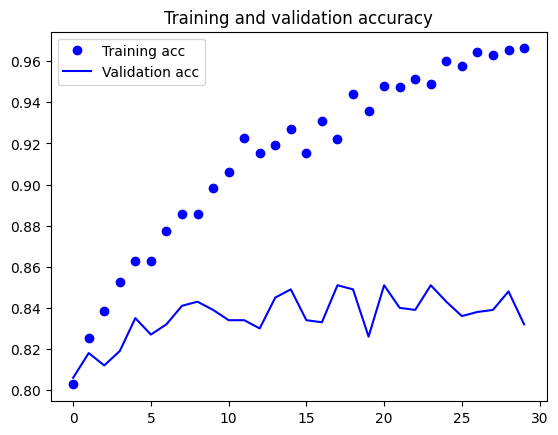

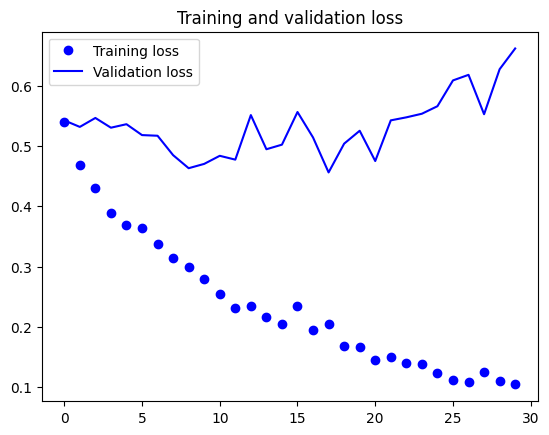

In [171]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [172]:
url = 'https://www.bhg.com.au/media/45088/how-to-grow-daisy-4.jpg?width=720&center=0.0,0.0'

from PIL import Image
import requests
from io import BytesIO
import numpy as np

def load_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

img = load_image(url)

img = img.resize((150,150))
x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3) -> add batch dimension
x = x.reshape((1,) + x.shape)

# Predict prob. that dog
model.predict(x)

1/1 [==============================] - 0s 117ms/step


array([[1., 0., 1., 1., 1.]], dtype=float32)